# 課題4. ヒストグラムと二値化
- ソースコードを実行し，ソースコードを読んで何をしているかを確認しなさい．
- プログラムを実行すると表示されるヒストグラムを参照して，以下のようなノイズを除去した二値画像が生成されるようにプログラム内のしきい値（元のプログラムでは70）を変更しなさい．
- !レポート!　作成したプログラムによってどのような処理が行われているのかを説明しなさい．また，その処理の中で使われている値を選択した理由を，ヒストグラムを使って分かりやすく説明しなさい

変換前の画像とヒストグラム


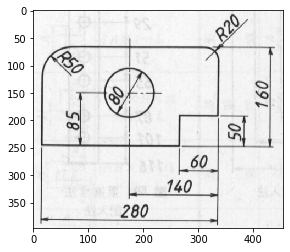

グレイスケールで数値化された変換前の画像と値の分布


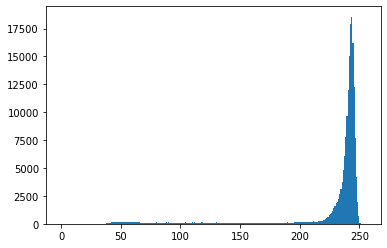

数値化された変換前の画像の中央値
114.0
数値化された変換前の画像の算術平均値
228
数値化された変換前の画像の調和平均値
208.788530079446
閾値を中央値として変換後の画像


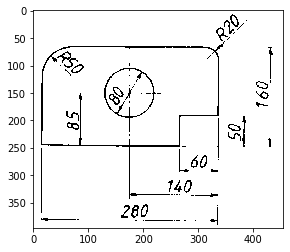

閾値を算術平均値として変換後の画像


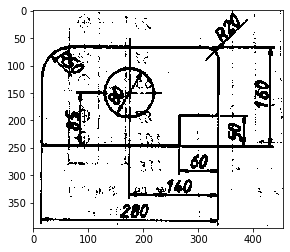

閾値を調和平均値として変換後の画像


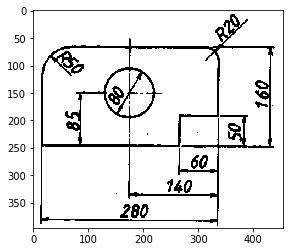

In [31]:
from pylab import *
from cv2 import imread
import statistics
import math

# ローカルディレクトリにDLした画像を読み込み
gazo = imread( "kadai5.bmp", 0 )
statistics_list = []

# 画像を表示
print( "変換前の画像とヒストグラム" )
# 引数について
# cmap          画像データをグレースケールとして扱う場合はcmap='gray'を設定する
# vmin          画像データのカラーマップの下限値を設定する
# vmax          画像データのカラーマップの上限値を設定する
# interpolation 画像を拡大表示する時の各ピクセルの補間方法を指定
imshow(gazo, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

#print( "数値化された変換前の画像" )
#print( gazo )

# ヒストグラムを表示
print( "グレイスケールで数値化された変換前の画像と値の分布" )
hist( gazo.flatten(), 256, (0,255) )
show()

# 統計値を導出する処理
for x in range(455):
    for y in range(396):
        statistics_list.append(gazo[y][x])

print( "数値化された変換前の画像の中央値" )
median = statistics.median(statistics_list)
print(median)

print( "数値化された変換前の画像の算術平均値" )
mean = statistics.mean(statistics_list)
print(mean)

print( "数値化された変換前の画像の調和平均値" )
harmonic_mean = statistics.harmonic_mean(statistics_list)
print(harmonic_mean)


# 変換データを格納する配列を0埋めしてピクセル数を要素数として455列x396行で初期化する
gazo2 = zeros((396,455))
gazo3 = zeros((396,455))
gazo4 = zeros((396,455))
# 画像を変換

#-----------------------------------------------------------------------------------#
# 閾値を中央値とした場合
#-----------------------------------------------------------------------------------#
for x in range(455):
    for y in range(396):
        ######### ここを変更 ############
        #if gazo[y][x]<70:
        if gazo[y][x]<median:
            # 値が閾値未満の場合は変換データを格納するインデクスへ黒を設定する
            gazo2[y][x] = 0
        else:
            # 値が閾値を越える場合は変換データを格納するインデクスへ白を設定する
            gazo2[y][x] = 255
        #############################

# 画像を表示
print("閾値を中央値として変換後の画像")
imshow(gazo2, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

#-----------------------------------------------------------------------------------#
# 算術平均値を中央値とした場合
#-----------------------------------------------------------------------------------#
# 画像を変換
for x in range(455):
    for y in range(396):
        ######### ここを変更 ############
        #if gazo[y][x]<70:
        if gazo[y][x]<mean:
            # 値が閾値未満の場合は変換データを格納するインデクスへ黒を設定する
            gazo3[y][x] = 0
        else:
            # 値が閾値を越える場合は変換データを格納するインデクスへ白を設定する
            gazo3[y][x] = 255
        #############################

# 画像を表示
print("閾値を算術平均値として変換後の画像")
imshow(gazo3, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

#-----------------------------------------------------------------------------------#
# 算術平均値を中央値とした場合
#-----------------------------------------------------------------------------------#
# 画像を変換
for x in range(455):
    for y in range(396):
        ######### ここを変更 ############
        #if gazo[y][x]<70:
        if gazo[y][x]<harmonic_mean:
            # 値が閾値未満の場合は変換データを格納するインデクスへ黒を設定する
            gazo4[y][x] = 0
        else:
            # 値が閾値を越える場合は変換データを格納するインデクスへ白を設定する
            gazo4[y][x] = 255
        #############################

# 画像を表示
print("閾値を調和平均値として変換後の画像")
imshow(gazo4, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

# 作成したプログラムによって行われている処理
1. 画像データをグレイスケールで数値化する
2. 統計値を導出する
2. 変換データを格納する配列を0埋めしてピクセル数を要素数として455列x396行で初期化する
3. 画像データをピクセル単位で繰り返し処理し値が閾値未満の場合は変換データを格納するインデクスへ黒を設定する
4. 変換データを格納する配列をグレイスケールで描画する

# 値を選択した理由
数値化された画像データから外れ値を除外する事で図形を鮮明に表示できると考え、ヒストグラムを参考に中央値、算術平均値、調和平均値を導出した.